### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
instacart = pd.read_pickle (r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\02 Data\Prepared Data\all_merged.pkl")

In [5]:
# make all columns visible

pd.set_option('display.max_columns', None)

In [6]:
# check import successful

instacart.head()

,user_id,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,is_new_customer,add_to_cart_order,reordered,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_of_purchase,spending_flag,frequency_flag,average_days_between_orders
0,26711,Deborah,Esquivel,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,False,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0
1,26711,Deborah,Esquivel,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,False,1,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0
2,26711,Deborah,Esquivel,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,False,2,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0
3,26711,Deborah,Esquivel,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443891,518967,prior,1,2,9,NaN,True,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0
4,26711,Deborah,Esquivel,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,False,2,1,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0


### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [8]:
# 'first_name' and 'surname' columns should be dropped to conform with PII laws

instacart.drop (columns = ['first_name', 'surname'], axis = 1, inplace = True)

In [9]:
# confirm columns dropped

instacart.head()

,user_id,gender,state,age,date_joined,no_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,is_new_customer,add_to_cart_order,reordered,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_of_purchase,spending_flag,frequency_flag,average_days_between_orders
0,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,False,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0
1,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,False,1,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0
2,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,False,2,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0
3,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443891,518967,prior,1,2,9,NaN,True,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0
4,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,False,2,1,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0


### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [12]:
# create regions by state

Northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest_states = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South_states = ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Mississippi', 'Tennessee', 'Kentucky', 'Arkansas', 'Louisiana']
West_states = ['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana', 'Wyoming', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Hawaii', 'Alaska']

In [13]:
# create column to sort state by region

instacart.loc[instacart['state'].isin (Northeast_states), 'region'] = 'Northeast'

In [14]:
instacart.loc[instacart['state'].isin (Midwest_states), 'region'] = 'Midwest'

In [15]:
instacart.loc[instacart['state'].isin (South_states), 'region'] = 'South'

In [16]:
instacart.loc[instacart['state'].isin (West_states), 'region'] = 'West'

In [17]:
# check for missing values in new column

instacart['region'].isnull().sum()

1905828

upon investigating the code there are some states I missed so I shall update the South_states perameter

In [19]:
missed_states = ['Washington DC', 'Texas', 'Oklahoma']

In [20]:
South_states = South_states + missed_states

In [21]:
print(South_states)

['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Mississippi', 'Tennessee', 'Kentucky', 'Arkansas', 'Louisiana', 'Washington DC', 'Texas', 'Oklahoma']


In [22]:
# rerun code to filter south states

instacart.loc[instacart['state'].isin (South_states), 'region'] = 'South'

In [23]:
# check for missing values again

instacart['region'].isnull().sum()

613695

In [24]:
null_rows = instacart[instacart['region'].isnull()]

In [25]:
print(null_rows)

          user_id  gender                 state  age date_joined  \
13623      202887    Male  District of Columbia   20  01/01/2017   
13624      202887    Male  District of Columbia   20  01/01/2017   
13625      202887    Male  District of Columbia   20  01/01/2017   
13626      202887    Male  District of Columbia   20  01/01/2017   
13627      202887    Male  District of Columbia   20  01/01/2017   
...           ...     ...                   ...  ...         ...   
32393884    89106  Female  District of Columbia   44  01/04/2020   
32393885    89106  Female  District of Columbia   44  01/04/2020   
32393886    89106  Female  District of Columbia   44  01/04/2020   
32393887    89106  Female  District of Columbia   44  01/04/2020   
32393888    89106  Female  District of Columbia   44  01/04/2020   

          no_of_dependants                    marital_status  income  \
13623                    3  living with parents and siblings   84380   
13624                    3  living with

Now it appears the error is in the name of Washington DC being actually District of Columbia so we try again...

In [27]:
third_time_lucky = ['District of Columbia']

In [28]:
South_states = South_states + third_time_lucky

In [29]:
instacart.loc[instacart['state'].isin (South_states), 'region'] = 'South'

In [30]:
instacart['region'].isnull().sum()

0

In [31]:
# final checks to see if the number of rows matches the expected

instacart.shape

(32404859, 33)

In [32]:
instacart['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [33]:
10791885 + 8292913 + 7597325 + 5722736

32404859

Now we will determine whether there’s a difference in spending habits between the different U.S. regions.

In [35]:
# create crosstab to check

spending_crosstab = pd.crosstab(instacart['region'], instacart['spending_flag'], dropna =False)

In [36]:
print(spending_crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


In [37]:
# determine high and low spenders as a percentage of regional populations

midwest_pop = (155975 + 7441350)
Northeast_pop = (108225 + 5614511)
South_pop = (209691 + 10582194)
West_pop = (160354 + 8132559)



In [38]:
midwest_high_spenders = (155975/midwest_pop)*100

In [39]:
northeast_high_spenders = (108225/Northeast_pop)*100

In [40]:
south_high_spenders = (209691/South_pop)*100

In [41]:
west_high_spenders = (160354/West_pop)*100

In [42]:
midwest_high_spenders

2.053025242437305

In [43]:
northeast_high_spenders

1.8911408808653762

In [44]:
south_high_spenders

1.9430433144904713

In [45]:
west_high_spenders

1.9336269414619447

The are with the largest percentage of 'high spenders' is the Midwest

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [48]:
# create 'exclusion_flag' column and define perameters

instacart.loc[instacart['max_order'] <5, 'low_activity_flag'] = 'low_activity'

In [49]:
instacart.loc[instacart['max_order'] >=5, 'low_activity_flag'] = 'high_activity'

In [50]:
# check column created correctly

instacart.head()

,user_id,gender,state,age,date_joined,no_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,is_new_customer,add_to_cart_order,reordered,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_of_purchase,spending_flag,frequency_flag,average_days_between_orders,region,low_activity_flag
0,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,False,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity
1,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,False,1,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity
2,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,False,2,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity
3,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443891,518967,prior,1,2,9,NaN,True,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity
4,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,False,2,1,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity


In [51]:
# check value_count and check for null values

instacart['low_activity_flag'].isnull().sum()

0

In [52]:
instacart['low_activity_flag'].value_counts()

low_activity_flag
high_activity    30964564
low_activity      1440295
Name: count, dtype: int64

In [53]:
# define new dataframe with low_activity excluded

instacart_sample = instacart[instacart['low_activity_flag'] == 'high_activity']

In [54]:
instacart_sample.shape

(30964564, 34)

In [55]:
# export new instacart_sample

instacart_sample.to_pickle(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\02 Data\Prepared Data\4.10_high_activity_sample.pkl")

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

#### Create 'age_group' column

In [58]:
instacart_sample.loc[instacart_sample['age'] <=34, 'age_group'] = 'Young Adult'

C:\Users\agwsi\AppData\Local\Temp\ipykernel_22852\196557226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_sample.loc[instacart_sample['age'] <=34, 'age_group'] = 'Young Adult'


In [59]:
instacart_sample.loc[(instacart_sample['age'] >= 35) & (instacart_sample['age'] <= 59), 'age_group'] = 'Middle-Aged Adult'

In [60]:
instacart_sample.loc[instacart_sample['age'] >= 60, 'age_group'] = 'older_adult'

In [61]:
# perform checks

instacart_sample.head()

,user_id,gender,state,age,date_joined,no_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,is_new_customer,add_to_cart_order,reordered,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_of_purchase,spending_flag,frequency_flag,average_days_between_orders,region,low_activity_flag,age_group
0,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,False,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult
1,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,False,1,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult
2,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,False,2,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult
3,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443891,518967,prior,1,2,9,NaN,True,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult
4,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,False,2,1,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult


In [62]:
instacart_sample ['age_group'].value_counts()

age_group
Middle-Aged Adult    12147765
older_adult          10574504
Young Adult           8242295
Name: count, dtype: int64

In [63]:
12147765 + 10574504 + 8242295

30964564

#### create 'income_level' column

In [65]:
# investigate income statistics

instacart['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [66]:
# create income levels based on statistics

instacart_sample.loc[instacart_sample['income'] <= 67004, 'income_level'] = 'low income'

C:\Users\agwsi\AppData\Local\Temp\ipykernel_22852\2928079629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_sample.loc[instacart_sample['income'] <= 67004, 'income_level'] = 'low income'


In [67]:
instacart_sample.loc[instacart_sample['income'] >= 127912, 'income_level'] = 'high_income'

In [68]:
instacart_sample.loc[(instacart_sample['income'] > 67004) & (instacart_sample['income'] < 127912), 'income_level'] = 'average_income'

In [69]:
instacart_sample.head()

,user_id,gender,state,age,date_joined,no_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,is_new_customer,add_to_cart_order,reordered,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_of_purchase,spending_flag,frequency_flag,average_days_between_orders,region,low_activity_flag,age_group,income_level
0,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,False,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income
1,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,False,1,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income
2,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,False,2,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income
3,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443891,518967,prior,1,2,9,NaN,True,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income
4,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,False,2,1,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income


In [70]:
instacart_sample ['income_level'].value_counts()

income_level
average_income    15530765
high_income        7771590
low income         7662209
Name: count, dtype: int64

In [71]:
15530765 + 7771590 + 7662209

30964564

In [72]:
instacart_sample['income_level'].isnull().sum()

0

#### Create 'department popularity' column

In [74]:
instacart_sample['department_id'].value_counts()

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [75]:
# rank the departments by popularity

most_popular_departments = [4, 16, 19, 7, 1, 13, 3]
average_popular_departments = [15, 20, 9, 17, 12, 14, 11]
least_popular_departments = [18, 6, 5, 8, 21, 2, 10]

In [76]:
# create column of department popularity

instacart_sample.loc[instacart_sample['department_id'].isin(most_popular_departments), 'department_popularity'] = 'Very Popular Department'

C:\Users\agwsi\AppData\Local\Temp\ipykernel_22852\2502265989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_sample.loc[instacart_sample['department_id'].isin(most_popular_departments), 'department_popularity'] = 'Very Popular Department'


In [77]:
instacart_sample.loc[instacart_sample['department_id'].isin(average_popular_departments), 'department_popularity']= 'Normal Popularity Department'

In [78]:
instacart_sample.loc[instacart_sample['department_id'].isin(least_popular_departments), 'department_popularity'] = 'Least Popular Departments'

In [79]:
# check that all is well in the new column

instacart_sample.head()

,user_id,gender,state,age,date_joined,no_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,is_new_customer,add_to_cart_order,reordered,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_of_purchase,spending_flag,frequency_flag,average_days_between_orders,region,low_activity_flag,age_group,income_level,department_popularity
0,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,False,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department
1,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,False,1,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department
2,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,False,2,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department
3,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443891,518967,prior,1,2,9,NaN,True,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department
4,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,False,2,1,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department


In [80]:
instacart_sample['department_popularity'].value_counts()

department_popularity
Very Popular Department         24620026
Normal Popularity Department     5307838
Least Popular Departments        1036700
Name: count, dtype: int64

In [81]:
instacart_sample['department_popularity'].isnull().sum()

0

#### Create 'dependents' column

In [83]:
instacart_sample['no_of_dependants'].value_counts()

no_of_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [84]:
instacart_sample.loc[instacart_sample['no_of_dependants'] ==0, 'has_dependents'] = 'No Dependents'

C:\Users\agwsi\AppData\Local\Temp\ipykernel_22852\695781192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_sample.loc[instacart_sample['no_of_dependants'] ==0, 'has_dependents'] = 'No Dependents'


In [85]:
instacart_sample.loc[instacart_sample['no_of_dependants'] >0, 'has_dependents'] = 'Has Dependents'

In [86]:
# check new column

instacart_sample.head()

,user_id,gender,state,age,date_joined,no_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,is_new_customer,add_to_cart_order,reordered,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_of_purchase,spending_flag,frequency_flag,average_days_between_orders,region,low_activity_flag,age_group,income_level,department_popularity,has_dependents
0,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,False,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents
1,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,False,1,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents
2,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,False,2,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents
3,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443891,518967,prior,1,2,9,NaN,True,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents
4,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,False,2,1,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents


In [87]:
instacart_sample['has_dependents'].value_counts()

has_dependents
Has Dependents    23224883
No Dependents      7739681
Name: count, dtype: int64

In [88]:
instacart_sample['has_dependents'].isnull().sum()

0

## 6. Create an appropriate visualization to show the distribution of profiles.

In [90]:
# show columns 

instacart_sample.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0', 'order_id', 'eval_set',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'is_new_customer', 'add_to_cart_order',
       'reordered', 'price_range', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_price_of_purchase',
       'spending_flag', 'frequency_flag', 'average_days_between_orders',
       'region', 'low_activity_flag', 'age_group', 'income_level',
       'department_popularity', 'has_dependents'],
      dtype='object')

In [91]:
# isolate relevant columns

customer_profiles = instacart_sample[['user_id', 'age_group', 'region', 'income_level', 'has_dependents', 'spending_flag', 'loyalty_flag']]

In [92]:
# check result

customer_profiles.head()

,user_id,age_group,region,income_level,has_dependents,spending_flag,loyalty_flag
0,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer
1,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer
2,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer
3,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer
4,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer


In [93]:
# remove duplicates so that all customers are unique

unique_customer_profiles = customer_profiles.drop_duplicates()

In [94]:
# check result

unique_customer_profiles.head()

,user_id,age_group,region,income_level,has_dependents,spending_flag,loyalty_flag
0,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer
18,33890,Middle-Aged Adult,West,low income,No Dependents,Low spender,Regular customer
91,65803,Middle-Aged Adult,West,average_income,Has Dependents,Low spender,New customer
195,125935,Middle-Aged Adult,Midwest,low income,No Dependents,Low spender,Regular customer
351,130797,Young Adult,South,low income,Has Dependents,Low spender,Regular customer


#### creating chart for each column

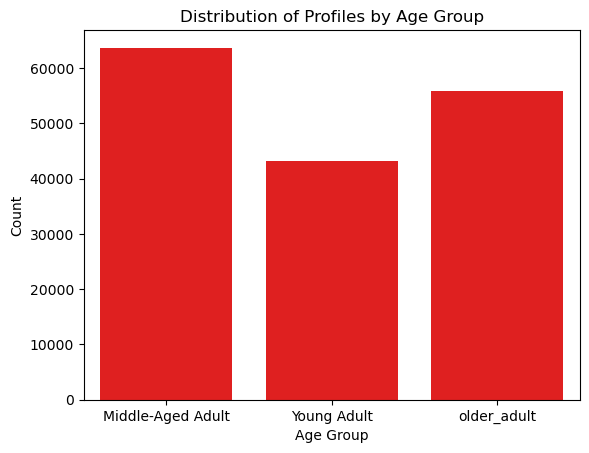

In [299]:
# Age group distribution

age_group_dist = plt.figure()
sns.countplot(data=unique_customer_profiles, x='age_group', color= 'red')
plt.title('Distribution of Profiles by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

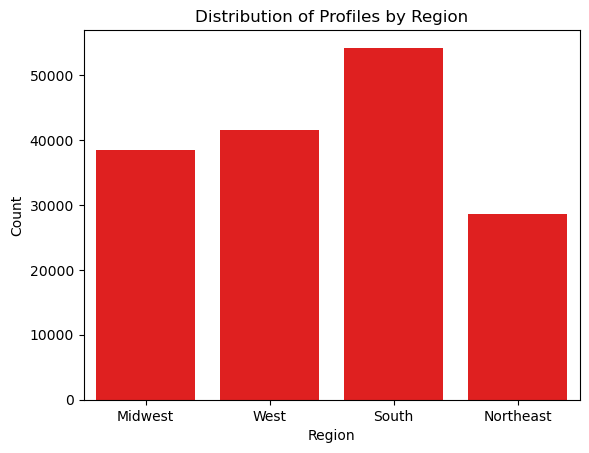

In [301]:
# Regional distribution

region_dist = plt.figure()
sns.countplot(data=unique_customer_profiles, x='region', color = 'red')
plt.title('Distribution of Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

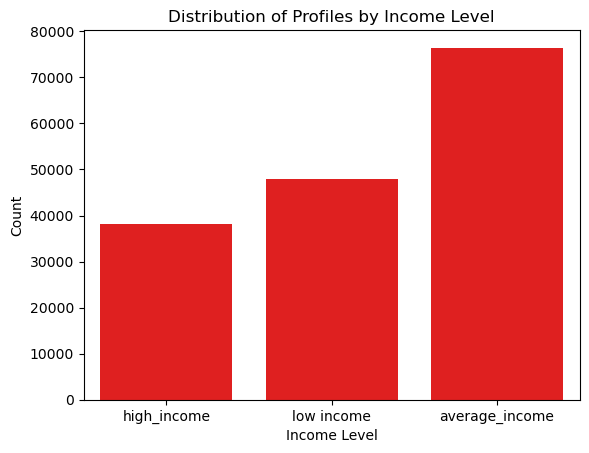

In [303]:
# Income level distribution

income_level_dist = plt.figure()
sns.countplot(data=unique_customer_profiles, x='income_level', color='red')
plt.title('Distribution of Profiles by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()


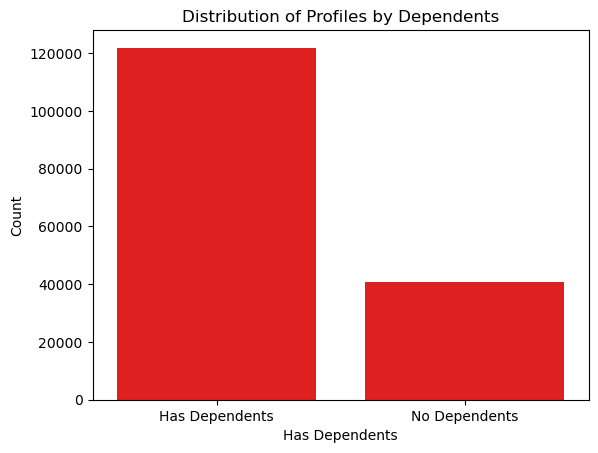

In [305]:
# Distribution by dependents or no dependents

dependents_dist = plt.figure()
sns.countplot(data=unique_customer_profiles, x='has_dependents', color= 'red')
plt.title('Distribution of Profiles by Dependents')
plt.xlabel('Has Dependents')
plt.ylabel('Count')
plt.show()


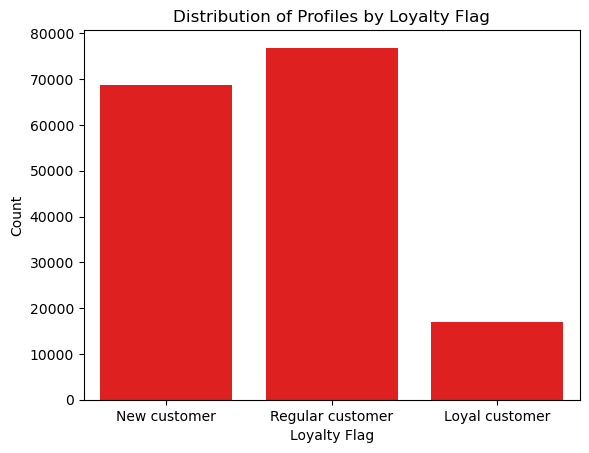

In [307]:
# Distribution by loyalty

loyalty_flag_dist = plt.figure()
sns.countplot(data=unique_customer_profiles, x='loyalty_flag', color = 'red')
plt.title('Distribution of Profiles by Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.show()


## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [102]:
# here is the final version of a code which took a long time to create to hopefully answer the question

customer_profiles_2 = instacart_sample.groupby(['user_id',  'age_group',  'region', 'income_level', 'has_dependents',  'spending_flag',  'loyalty_flag'
]).agg({ 'days_since_prior_order': ['max', 'mean', 'min'],  'prices': ['max', 'mean', 'min', 'sum']
}).reset_index().rename(columns={ ('days_since_prior_order', 'max'): 'max_days_between_orders',('days_since_prior_order', 'mean'): 'mean_days_between_orders',
('days_since_prior_order', 'min'): 'min_days_between_orders', ('prices', 'max'): 'max_total_expenditure',('prices', 'mean'): 'mean_total_expenditure',
('prices', 'min'): 'min_total_expenditure',('prices', 'sum'): 'total_expenditure'})



In [103]:
# check

customer_profiles_2.head()

user_id          age_group     region    income_level  has_dependents  \
                                                                          
0       1        Young Adult      South      low income  Has Dependents   
1       2        older_adult       West      low income  Has Dependents   
2       3        Young Adult       West  average_income  Has Dependents   
3       4        Young Adult      South      low income  Has Dependents   
4       7  Middle-Aged Adult  Northeast  average_income  Has Dependents   

  spending_flag      loyalty_flag days_since_prior_order                  \
                                                     max       mean  min   
0   Low spender      New customer                   30.0  20.259259  0.0   
1   Low spender  Regular customer                   30.0  15.967033  3.0   
2   Low spender  Regular customer                   21.0  11.487179  7.0   
3   Low spender      New customer                   21.0  15.357143  0.0   
4   Low spender  Regular customer                   30.0  13.546392  2.0   

  prices                         
     max      mean  min     sum  
0   14.0  6.367797  1.0   375.7  
1   14.8  7.515897  1.3  1465.6  
2   14.4  8.197727  1.3   721.4  
3   14.6  8.205556  1.4   147.7  
4   23.2  7.466990  1.1  1538.2

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [105]:
# import departments information

department_names = pd.read_csv(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\02 Data\Prepared Data\departments_wrangled.csv", index_col = 0)

In [106]:
# check

department_names.head(21)

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


##### add department_id column name

In [107]:
department_names.index.name = 'department_id'

In [108]:
department_names.head(21)

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


#### Merge dfs on deprtment_id

In [199]:
merged_df = instacart_sample.merge(department_names, on='department_id', how='inner')

In [201]:
merged_df.head()

,user_id,gender,state,age,date_joined,no_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,is_new_customer,add_to_cart_order,reordered,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_of_purchase,spending_flag,frequency_flag,average_days_between_orders,region,low_activity_flag,age_group,income_level,department_popularity,has_dependents,department
0,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,False,2,0,Mid-range product,Busiest days,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents,beverages
1,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,False,1,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents,beverages
2,26711,Female,Missouri,48,01/01/2017,3,married,165665,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,False,2,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents,beverages
3,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443891,518967,prior,1,2,9,NaN,True,1,0,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents,produce
4,26711,Female,Missouri,48,01/01/2017,3,married,165665,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,False,2,1,Low-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,Regular customer,19.0,Midwest,high_activity,Middle-Aged Adult,high_income,Very Popular Department,Has Dependents,produce


In [223]:
merged_df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0', 'order_id', 'eval_set',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'is_new_customer', 'add_to_cart_order',
       'reordered', 'price_range', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_price_of_purchase',
       'spending_flag', 'frequency_flag', 'average_days_between_orders',
       'region', 'low_activity_flag', 'age_group', 'income_level',
       'department_popularity', 'has_dependents', 'department'],
      dtype='object')

In [225]:
# take relevant columns

instacart_departments = merged_df[['user_id', 'age_group', 'region', 'income_level', 'has_dependents', 'spending_flag', 'loyalty_flag', 'average_days_between_orders', 'prices','department']]

In [227]:
# check

instacart_departments.head()

,user_id,age_group,region,income_level,has_dependents,spending_flag,loyalty_flag,average_days_between_orders,prices,department
0,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer,19.0,9.0,beverages
1,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer,19.0,9.0,beverages
2,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer,19.0,9.0,beverages
3,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer,19.0,4.3,produce
4,26711,Middle-Aged Adult,Midwest,high_income,Has Dependents,Low spender,New customer,19.0,4.3,produce


#### Create crosstab to investigate

In [229]:
region_department_crosstab = pd.crosstab(index=instacart_departments['region'],columns=instacart_departments['department'],margins=True, margins_name='Total')

In [231]:
region_department_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,Total
region,,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,498225,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143,7261513
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,370436,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154,5464685
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,709906,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780,10311139
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,543164,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329,7927227
Total,144627,410392,1120828,2571901,670850,33451,1012074,5177182,1003834,822136,2121731,699857,255991,674781,64768,34411,1782705,424306,93060,9079273,2766406,30964564


In [245]:
# Group by region and department, then aggregate profile statistics

profile_summary = instacart_departments.groupby(['region', 'department']).agg({'user_id': 'count',   'prices': 'sum',  'average_days_between_orders': 'mean' 
}).reset_index()

In [247]:
profile_summary

,region,department,user_id,prices,average_days_between_orders
0,Midwest,alcohol,34043,276848.1,9.528405
1,Midwest,babies,95741,728255.6,8.829352
2,Midwest,bakery,261753,2058264.6,10.000006
3,Midwest,beverages,598979,4603242.9,10.077588
4,Midwest,breakfast,156155,1252947.3,10.143130
...,...,...,...,...,...
79,West,pantry,457886,3672012.4,10.151772
80,West,personal care,106647,853650.3,10.492438
81,West,pets,24059,191608.6,11.100378
82,West,produce,2324678,18546191.9,9.674740


#### Rename prices column

In [253]:
profile_summary.rename(columns ={'prices':'total_spend'}, inplace =True)

In [257]:
#check

profile_summary

,region,department,user_id,total_spend,average_days_between_orders
0,Midwest,alcohol,34043,276848.1,9.528405
1,Midwest,babies,95741,728255.6,8.829352
2,Midwest,bakery,261753,2058264.6,10.000006
3,Midwest,beverages,598979,4603242.9,10.077588
4,Midwest,breakfast,156155,1252947.3,10.143130
...,...,...,...,...,...
79,West,pantry,457886,3672012.4,10.151772
80,West,personal care,106647,853650.3,10.492438
81,West,pets,24059,191608.6,11.100378
82,West,produce,2324678,18546191.9,9.674740


## 9. Produce suitable charts to illustrate your results and export them in your project folder.

#### Visualizations for departments sales by regions and total spend

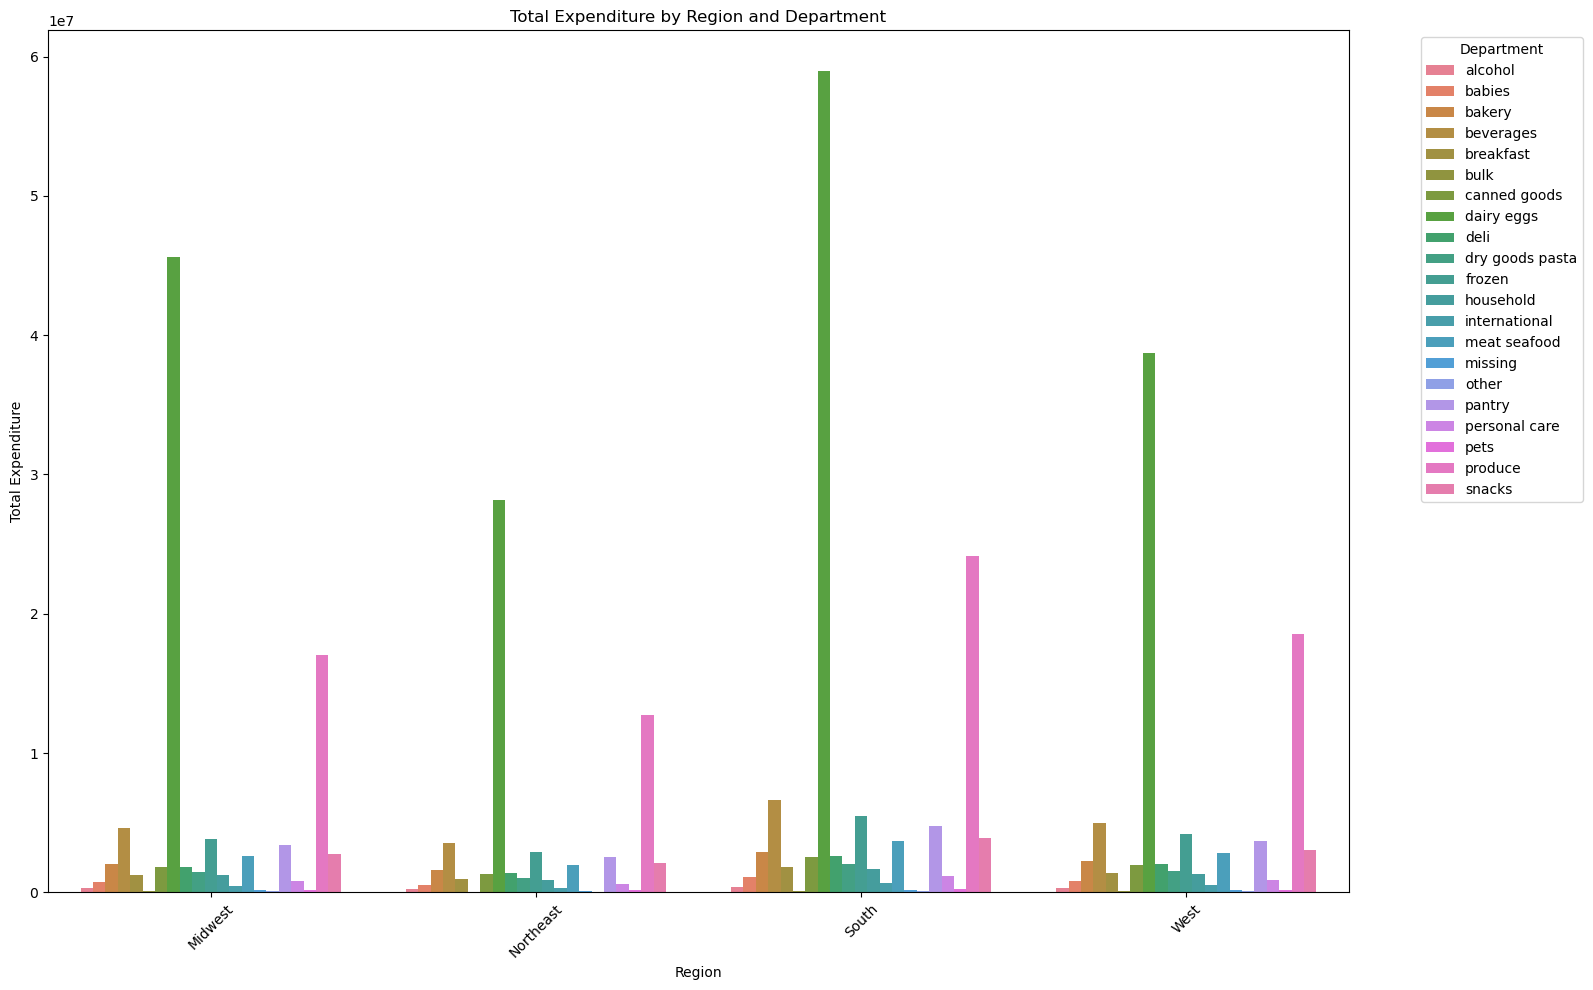

In [291]:
# Bar chart of total expenditure

depsalesregions_bar =plt.figure(figsize = (16,10))
sns.barplot(data=profile_summary, x='region', y='total_spend', hue='department')
plt.title('Total Expenditure by Region and Department')
plt.xlabel('Region')
plt.ylabel('Total Expenditure')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

No clear trends emerge

Text(120.72222222222221, 0.5, 'Region')

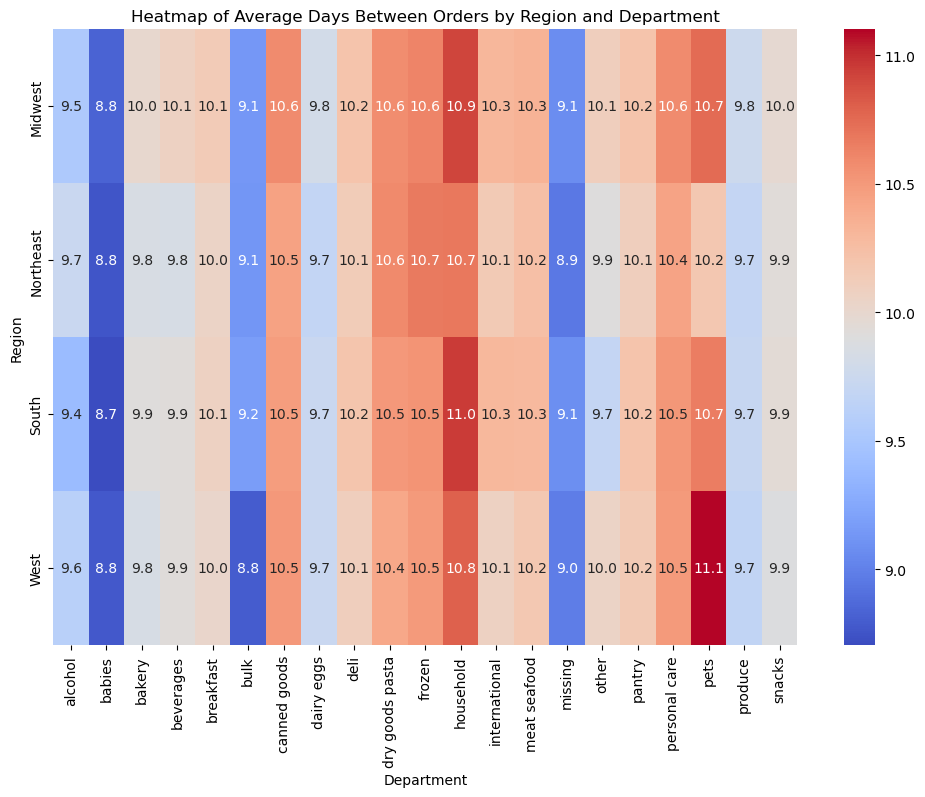

In [287]:
# Heatmap of average days between orders, region and department

heatmap = plt.figure(figsize=(12, 8))
heatmap_data = profile_summary.pivot_table(index='region', columns='department', values='average_days_between_orders')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap of Average Days Between Orders by Region and Department')
plt.xlabel('Department')
plt.ylabel('Region')

### Also no clear trends

## Export visuals

In [295]:
heatmap.savefig(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\04 Analysis\Visualizations\heatmap.png")

In [297]:
depsalesregions_bar.savefig(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\04 Analysis\Visualizations\dep_sales_regions_bar.png")

In [309]:
age_group_dist.savefig(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\04 Analysis\Visualizations\age_group_dist.png")

In [311]:
region_dist.savefig(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\04 Analysis\Visualizations\region_dist.png")

In [313]:
dependents_dist.savefig(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\04 Analysis\Visualizations\dependents_dist.png")

In [315]:
loyalty_flag_dist.savefig(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\04 Analysis\Visualizations\loyalty_flag_dist.png")

## Export dataframes

In [321]:
profile_summary.to_csv(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\02 Data\Prepared Data\profile_summary_final.csv")

In [323]:
merged_df.to_pickle(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\02 Data\Prepared Data\alldata_with_departments.pkl")

In [324]:
unique_customer_profiles.shape

(162631, 7)

In [327]:
unique_customer_profiles.to_csv(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\02 Data\Prepared Data\unique_customer_profiles.csv")

In [6]:
df = pd.read_pickle(r"C:\Users\agwsi\CF\4. Python\11-06-24 Instacart project\02 Data\Prepared Data\alldata_with_departments.pkl")

In [4]:
import pandas as pd
import os
import numpy as np

In [2]:
instacart_sample.shape

NameError: name 'instacart_sample' is not defined